# Moving Average Convergence Divergence (MACD)

Hello again, in this notebook we are going to go through one the most used method in trading MACD

We can get the MACD by substracting 2 exponential moving averages of periiod 12 and 26 respectively and then a signal which is just an exponential moving average of period 9. 

In [1]:
#imports necessary packages
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

plt.style.use('fivethirtyeight')

In [2]:
#we should set a period
start_date = datetime.datetime(2021,1,1)
end_date = datetime.datetime(2021,4,30)

#downlaoding the dataa
data = yf.download('TSLA', start=start_date, end=end_date, group_by='ticker')

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,699.989990,718.719971,691.119995,705.669983,705.669983,49649900
2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200
2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200
2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000
2021-01-07,777.630005,816.989990,775.200012,816.039978,816.039978,51498900


In [4]:
def MACD(df, fast_period, slow_period, signal_period):
    data = pd.DataFrame(df.copy())
    data['fast_MA'] = df.ewm(span=fast_period, adjust=False).mean()
    data['slow_MA'] = df.ewm(span=slow_period, adjust=False).mean()
    data['MACD']    = data['slow_MA']-data['fast_MA']
    data['signal']  = data['MACD'].ewm(span=signal_period, adjust=False).mean()
    return data

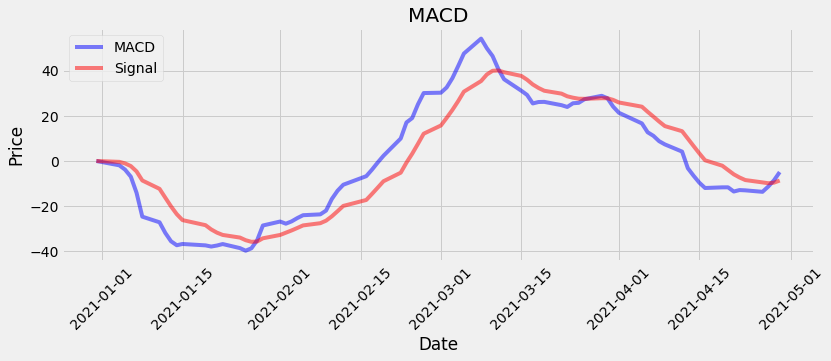

In [5]:
data = MACD(data['Adj Close'], 12, 26, 9)

plt.figure(figsize=(12,4))
plt.plot(data['MACD'], color='blue' ,label='MACD', alpha=0.5)
plt.plot(data['signal'], color='red' ,label='Signal', alpha=0.5)
plt.title("MACD")
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

### Indicator

The interpretation of the MACD is simple, when the Blue line (MACD) cross in upper the red one (Signal) it's a sign to buy and when the blue line cross the signal in lower it's an indicator to sell.

We will try to implement this interperation in Python so let's code it.

In [6]:
def buy_sell_indicator(df, dict):
    MACD, signal, price = df[dict[0]], df[dict[1]], df[dict[2]]
    size   = df.shape[0]
    sell, buy = list(), list()
    flag = -1
    for i in range(size):
        if(MACD[i]>signal[i]):
            sell.append(np.nan)
            if flag != 1:
                buy.append(price[i])
                flag=1
            else:
                buy.append(np.nan)
        elif(MACD[i]<signal[i]):
            buy.append(np.nan)
            if flag != 0:
                sell.append(price[i])
                flag=0
            else:
                sell.append(np.nan)
        else:
            sell.append(np.nan)
            buy.append(np.nan)
    return buy, sell

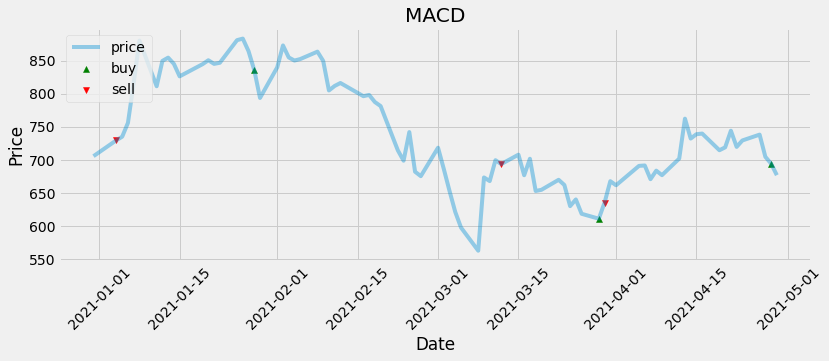

In [7]:
data['buy'], data['sell'] = buy_sell_indicator(data, {0:'MACD', 1:'signal', 2:'Adj Close'})

plt.figure(figsize=(12,4))
plt.plot(data['Adj Close'], label='price', alpha=0.4)
plt.scatter(data.index, data['buy'], color='green' ,label='buy', marker='^', alpha=1)
plt.scatter(data.index, data['sell'], color='red' ,label='sell', marker='v', alpha=1)
plt.title("MACD")
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()